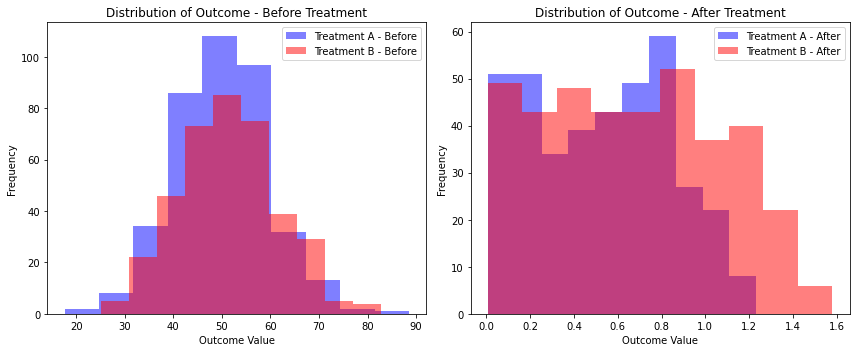

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Outcome_Before
No. Observations: 766     Method:             REML          
No. Groups:       766     Scale:              48.9088       
Min. group size:  1       Log-Likelihood:     -2840.7633    
Max. group size:  1       Converged:          Yes           
Mean group size:  1.0                                       
------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept       50.156    0.021 2365.392 0.000 50.115 50.198
Treatment[T.B]   1.402    0.484    2.897 0.004  0.453  2.350
Group Var       48.909                                      

Power analysis result: 0.9744093723269084


/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.power import FTestAnovaPower

# 1. Simulate Data

np.random.seed(42)

n_per_group = 383
subjects = list(range(n_per_group * 2))
treatments = ["A"] * n_per_group + ["B"] * n_per_group

# Simulate normal distributed outcome
outcome_before_A = np.random.normal(50, 10, n_per_group)
outcome_before_B = np.random.normal(52, 10, n_per_group)

# Simulate exponential growth outcome as an effect of treatment
base_growth = np.random.rand(n_per_group * 2)
outcome_after_A = base_growth[:n_per_group] * np.exp(0.1 * np.random.randn(n_per_group))
outcome_after_B = base_growth[n_per_group:] * np.exp(0.3 + 0.1 * np.random.randn(n_per_group))

data = pd.DataFrame({
    'Subject': subjects,
    'Treatment': treatments,
    'Outcome_Before': list(outcome_before_A) + list(outcome_before_B),
    'Outcome_After': list(outcome_after_A) + list(outcome_after_B)
})

# 2. Plot the Distribution

plt.figure(figsize=(12, 5))

# Before Treatment
plt.subplot(1, 2, 1)
plt.hist(data[data['Treatment'] == 'A']['Outcome_Before'], alpha=0.5, label='Treatment A - Before', color='blue')
plt.hist(data[data['Treatment'] == 'B']['Outcome_Before'], alpha=0.5, label='Treatment B - Before', color='red')
plt.legend()
plt.title('Distribution of Outcome - Before Treatment')
plt.xlabel('Outcome Value')
plt.ylabel('Frequency')

# After Treatment
plt.subplot(1, 2, 2)
plt.hist(data[data['Treatment'] == 'A']['Outcome_After'], alpha=0.5, label='Treatment A - After', color='blue')
plt.hist(data[data['Treatment'] == 'B']['Outcome_After'], alpha=0.5, label='Treatment B - After', color='red')
plt.legend()
plt.title('Distribution of Outcome - After Treatment')
plt.xlabel('Outcome Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Mixed Effects Model

# Using a simpler linear mixed model for illustration on the "before" data.
model_before = smf.mixedlm("Outcome_Before ~ Treatment", data, groups=data["Subject"]).fit()
print(model_before.summary())

# 4. Power Analysis

effect_size = (data[data['Treatment'] == 'B']['Outcome_Before'].mean() - data[data['Treatment'] == 'A']['Outcome_Before'].mean()) / data['Outcome_Before'].std()
alpha = 0.05
analysis = FTestAnovaPower().solve_power(effect_size=effect_size, nobs=n_per_group * 2, alpha=alpha, power=None)
print(f"Power analysis result: {analysis}")


/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


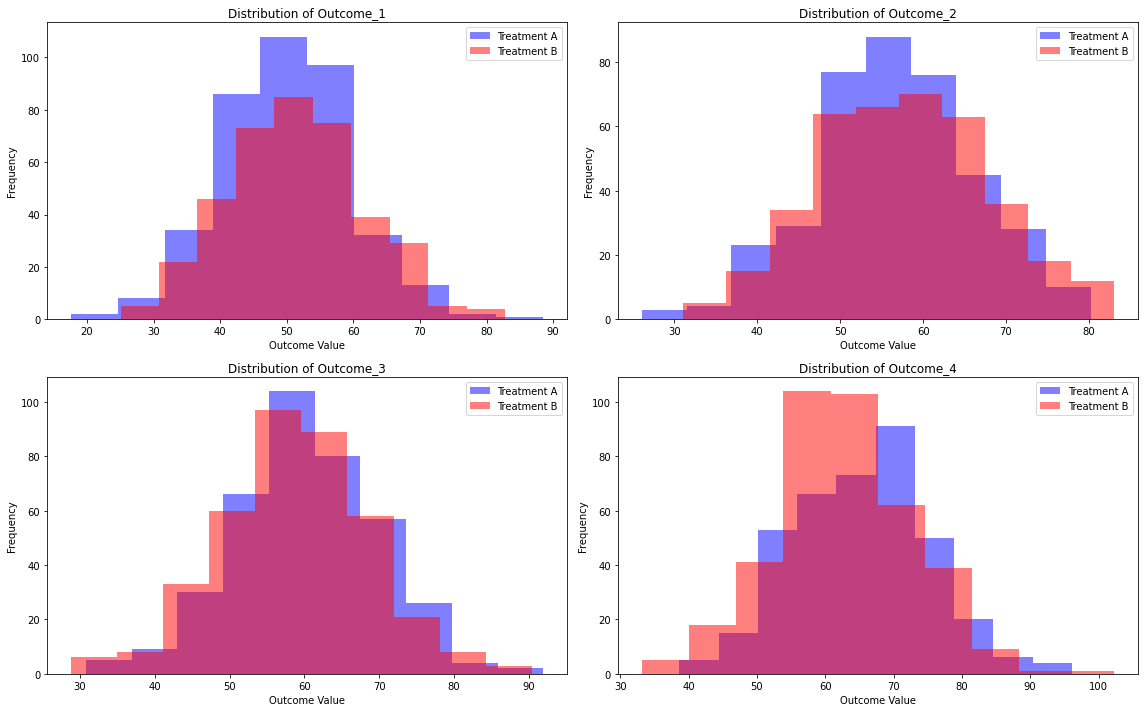


ANOVA for Outcome_1
                 sum_sq     df         F    PR(>F)
Treatment    376.182617    1.0  3.845753  0.050235
Residual   74732.707094  764.0       NaN       NaN

ANOVA for Outcome_2
                 sum_sq     df         F   PR(>F)
Treatment    256.013974    1.0  2.619507  0.10597
Residual   74668.520309  764.0       NaN      NaN

ANOVA for Outcome_3
                 sum_sq     df         F    PR(>F)
Treatment    342.789281    1.0  3.564321  0.059413
Residual   73475.710169  764.0       NaN       NaN

ANOVA for Outcome_4
                 sum_sq     df          F    PR(>F)
Treatment   1172.808955    1.0  11.977254  0.000568
Residual   74810.640986  764.0        NaN       NaN


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Simulate Data
np.random.seed(42)

n_per_group = 383
subjects = list(range(n_per_group * 2))
treatments = ["A"] * n_per_group + ["B"] * n_per_group

mean_outcomes_A = [50, 55, 60, 65]
mean_outcomes_B = [52, 57, 59, 63]
std_dev = 10

data_list = []

for idx, (mean_a, mean_b) in enumerate(zip(mean_outcomes_A, mean_outcomes_B)):
    outcome_A = np.random.normal(mean_a, std_dev, n_per_group)
    outcome_B = np.random.normal(mean_b, std_dev, n_per_group)
    
    data = pd.DataFrame({
        'Subject': subjects,
        'Treatment': treatments,
        f'Outcome_{idx + 1}': list(outcome_A) + list(outcome_B)
    })
    
    data_list.append(data)

# Merge all outcome dataframes
data_merged = data_list[0]
for df in data_list[1:]:
    data_merged = pd.merge(data_merged, df, on=['Subject', 'Treatment'])

# 2. Plot the Distributions
plt.figure(figsize=(16, 10))

for idx in range(4):
    plt.subplot(2, 2, idx + 1)
    
    plt.hist(data_merged[data_merged['Treatment'] == 'A'][f'Outcome_{idx + 1}'], alpha=0.5, label='Treatment A', color='blue')
    plt.hist(data_merged[data_merged['Treatment'] == 'B'][f'Outcome_{idx + 1}'], alpha=0.5, label='Treatment B', color='red')
    
    plt.legend()
    plt.title(f'Distribution of Outcome_{idx + 1}')
    plt.xlabel('Outcome Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Statistical Tests
for idx in range(4):
    sub_data = data_merged[['Treatment', f'Outcome_{idx + 1}']]
    model = ols(f'Outcome_{idx + 1} ~ Treatment', data=sub_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    print(f"\nANOVA for Outcome_{idx + 1}")
    print(anova_table)
